# Multiple Variable Linear Regression



In this homework assignment, we will build a complete ML solution for a real ML task. You already have all the knowledge needed for this. Follow the instructions and use the lecture materials to complete the tasks. Here, the instructions will be detailed, and in subsequent tasks, they will become less detailed so that you can start structuring an ML project independently, and by the end of the course, solving any ML task will be eazy-breezy.

## Dataset

We will work with the dataset `cars.csv`, which describes cars and their prices in Indian Rupees :) The goal is to predict the price of a car based on its characteristics. Description of the dataset:

| Column Name            | Description                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Unique identifier for each car advertisement.                                                                                         |
| Brand                  | Brand or manufacturer of the car (e.g., Toyota, Honda, Ford, etc.).                                                                                     |
| Model                  | Model of the car (e.g., Camry, Civic, Mustang, etc.).                                                                                               |
| Year                   | Year of manufacture of the car.                                                                                                                            |
| Kilometers_Driven      | Total mileage of the car in kilometers.                                                                                                               |
| Fuel_Type              | Type of fuel used by the car (e.g., petrol, diesel, electric, etc.).                                                                      |
| Transmission           | Type of transmission of the car (e.g., manual, automatic).                                                                                           |
| Owner_Type             | Number of previous owners of the car (e.g., first, second, third).                                                                           |
| Mileage                | Fuel efficiency of the car in kilometers per liter.                                                                                                   |
| Engine                 | Engine capacity of the car in cubic centimeters (CC).                                                                                                   |
| Power                  | Maximum power of the car in horsepower (bhp).                                                                                               |
| Seats                  | Number of seats in the car.                                                                                                                           |
| Price                  | Price of the car in INR (Indian Rupees), which is the target variable for prediction.                                                                   |

# Imports

For convenience, I recommend placing all imports here at the top, so that when you restart the notebook, you can import all the necessary libraries in one go by running the import cell.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import OrdinalEncoder

# Introduction to the Data

**Task 1.** Load the dataset `cars.csv` into a pandas.DataFrame. Display the first 5 records.

In [ ]:
path = "../../../data/cars.csv"
df = pd.read_csv(path)
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Task 2.** Output the data types of the columns in the dataset, and also investigate what actual data types the records in each column have (the `object` type can contain different data types) and how many values are in each categorical column.

Write a conclusion about how many numerical and categorical columns of each of the three different types are in the dataset (binary, multi-categorical without order, multi-categorical with order). Conclusion template:

```
The dataset contains 10 numerical and 10 categorical columns, of which
- 2 are binary (have only 2 values)
- 6 are multi-categorical (more than 2 values) with values that have no order relationship
- 2 columns where an order relationship can be established (for example Small<Medium<Large)
```

If you don't know how to do this with `pandas` - here are some hints about which methods might help you complete this task:

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

You can learn more about each of them in the [documentation](https://pandas.pydata.org/docs/reference/frame.html), or write a question mark and the method name in a separate cell (just remember to remove this before submission, as reviewing the documentation does not help understand the data and the thought process, and your work is like a presentation to the client of the completed task).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [4]:
df_int = df.select_dtypes(include=['int64'])
df_int.describe()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,50.500000,2018.39000,28150.000000,17.210000,1855.230000,158.130000,5.230000,1.574000e+06
std,29.011492,1.17116,9121.375716,3.309902,631.311475,76.968137,0.750151,1.000265e+06
min,1.000000,2016.00000,10000.000000,10.000000,999.000000,68.000000,4.000000,4.500000e+05
25%,25.750000,2017.75000,22000.000000,15.000000,1462.000000,103.000000,5.000000,7.000000e+05
50%,50.500000,2018.00000,27000.000000,17.000000,1774.000000,148.000000,5.000000,1.300000e+06
75%,75.250000,2019.00000,32000.000000,19.000000,2143.000000,187.000000,5.000000,2.500000e+06
max,100.000000,2021.00000,60000.000000,25.000000,4951.000000,396.000000,7.000000,4.000000e+06


In [ ]:
df_obj = df.select_dtypes(include=['object'])

columns = df_obj.columns
for col in columns:
    print(f'\n {col} data: {df[col].unique()}')
    print(f' {col}: {df[col].nunique()}')


 Brand data: ['Toyota' 'Honda' 'Ford' 'Maruti' 'Hyundai' 'Tata' 'Mahindra' 'Volkswagen'
 'Audi' 'BMW' 'Mercedes']
 Brand: 11

 Model data: ['Corolla' 'Civic' 'Mustang' 'Swift' 'Sonata' 'Nexon' 'Scorpio' 'Polo'
 'A4' 'X1' 'C-Class' 'Endeavour' 'Creta' 'Harrier' 'Ertiga' 'City'
 'Tiguan' 'Q3' '5 Series' 'GLC' 'Innova' 'Figo' 'Verna' 'Altroz' 'Thar'
 'Passat' 'A6' 'X3' 'E-Class' 'Fortuner' 'Aspire' 'Elantra' 'Safari'
 'Vitara' 'WR-V' 'Ameo' 'A3' '7 Series' 'GLE' 'Yaris' 'Ranger' 'Santro'
 'Tigor' 'S-Cross' 'BR-V' 'T-Roc' 'Q7' 'X5' 'GLA' 'Camry' 'Venue' 'Tiago'
 'XUV300' 'Vento' 'A5' '3 Series' 'Innova Crysta' 'EcoSport']
 Model: 58

 Fuel_Type data: ['Petrol' 'Diesel']
 Fuel_Type: 2

 Transmission data: ['Manual' 'Automatic']
 Transmission: 2

 Owner_Type data: ['First' 'Second' 'Third']
 Owner_Type: 3


### Conclusion of Homework 2

The data contains 13 columns:

8 Numerical 
- of which Car_ID - which contains a sequential number and can be converted to a string or removed.

5 Categorical
- 2 binary - 
    -  Transmission
    -  Fuel_Type
- 2 multi-categorical (more than 2 values) with values that have no order relationship
    -  Brand 
    -  Model 
- 1 column where an order relationship can be established (for example Small<Medium<Large)
   -  Owner_Type

**Task 3**. Split the data into training and testing sets. Allocate 20% for testing, set `random_state=12`. We will be predicting the `Price` column - so it is the target variable. As a result, you should have 4 datasets: `X_train, X_test, y_train, y_test`.

In the future, we will train the methods for encoding, scaling, and the model only on the training data `X_train` (and `y_train` for the model), while on the test data we will only use the already trained methods for encoding, scaling, and the model by calling `transform()` (for data processing methods) or `predict()` (for the model).

And this is how it should always be done.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Price'), df.Price, test_size=0.2, random_state=12)

# Let's check the number of columns and rows in each dataset to ensure they have the same dimensions
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, df.shape)

(80, 12) (20, 12) (80,) (20,) (100, 13)


**Task 4**. Encoding categorical columns.

1. Encode the columns with binary values `Fuel_Type` and `Transmission` so that they are in numerical representation and contain only 0 and 1. An example was given in the lecture. Let the value 1 be in the category that contains more values in the column.

2. Encode the `Brand` column using `sklearn.preprocessing.OneHotEncoder` similarly to how we did it in the lecture. Attention! We call the method `Encoder.fit()` on the training data `X_train`, and on the test data, we only call `Encoder.transform()`. Add the encoded values to the datasets `X_train`, `X_test`.

3. I will encode the `Owner_Type` column using `sklearn.preprocessing.OrdinalEncoder` for you. Analyze what is happening.

The `Model` column contains too many values to encode in its current form, given the small amount of data. If you see how to group the values in this column, reducing the number of unique values to 3-5, you can perform this transformation, use this column in the model, and gain additional practice and points if everything is done correctly. If done incorrectly, you will receive feedback on your work :)

In [ ]:
# 1. with binary values `Fuel_Type` and `Transmission`, let 1 be in the category that contains more values in the column.
# let's take the most popular value in the TRAIN set

print(X_train.Fuel_Type.value_counts())
popular_Fuel = X_train.Fuel_Type.value_counts().idxmax()

print(X_train.Transmission.value_counts())
popular_Transmission = X_train.Transmission.value_counts().idxmax()

print('the most popular value is:', popular_Fuel, ' and', popular_Transmission)

def map_binary(df, column_name, popular):
    df[f'{column_name}_coded'] = df[column_name].map(lambda x: 1 if x == popular else 0)
    return df

#train
X_train = map_binary(X_train, 'Fuel_Type', popular_Fuel)
X_train = map_binary(X_train, 'Transmission', popular_Transmission)
#test
X_test = map_binary(X_test, 'Fuel_Type', popular_Fuel)
X_test = map_binary(X_test, 'Transmission', popular_Transmission)

X_train.head() 

Fuel_Type
Petrol    41
Diesel    39
Name: count, dtype: int64
Transmission
Automatic    49
Manual       31
Name: count, dtype: int64
the most popular value is: Petrol  and Automatic


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_coded,Transmission_coded
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1


In [8]:
#`Brand` using `sklearn.preprocessing.OneHotEncoder`

encod = OneHotEncoder()
encod.fit(X_train[['Brand']])
print(encod.categories_)

#transform train
code_train_brand = encod.transform(X_train[['Brand']]).toarray()
X_train[encod.categories_[0]] = code_train_brand

#transform test
code_test_brand = encod.transform(X_test[['Brand']]).toarray()
X_test[encod.categories_[0]] = code_test_brand

print(X_train.shape, X_test.shape)
print(X_train.columns)

[array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
       'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)]
(80, 25) (20, 25)
Index(['Car_ID', 'Brand', 'Model', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Fuel_Type_coded', 'Transmission_coded', 'Audi', 'BMW', 'Ford', 'Honda',
       'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Toyota',
       'Volkswagen'],
      dtype='object')


In [ ]:
ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # defining the order of categories from least to greatest
ordenc.fit(X_train[['Owner_Type']]) # training the OrdinalEncoder on the training data

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']]) # similarly to OneHotEncoder, transforming the trained models to our data
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Expected result after transformations:

In [10]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_coded,Transmission_coded,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_coded,Transmission_coded,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Task 5.** Select only the numerical columns from `X_train` (you can use `pandas.select_dtypes(...)` for this or remove all non-numeric data, as we no longer need it), combine this data with `y_train` (conveniently with `pandas.concat([df1, df2], axis=1)`), build a correlation matrix for this data and analyze it. Write a conclusion about which columns correlate with the target variable by more than 0.5 in absolute value (it can be either positive or negative correlation).

In [ ]:
# removing all object type data - 5 columns

print(X_train.shape)
X_train.drop(columns = X_train.select_dtypes(include=['object']).columns, inplace=True)
print(X_train.columns)
print(X_train.shape)

(80, 26)
Index(['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Fuel_Type_coded', 'Transmission_coded', 'Audi', 'BMW', 'Ford',
       'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Toyota',
       'Volkswagen', 'Owner_Type_Codes'],
      dtype='object')
(80, 21)


<Axes: >

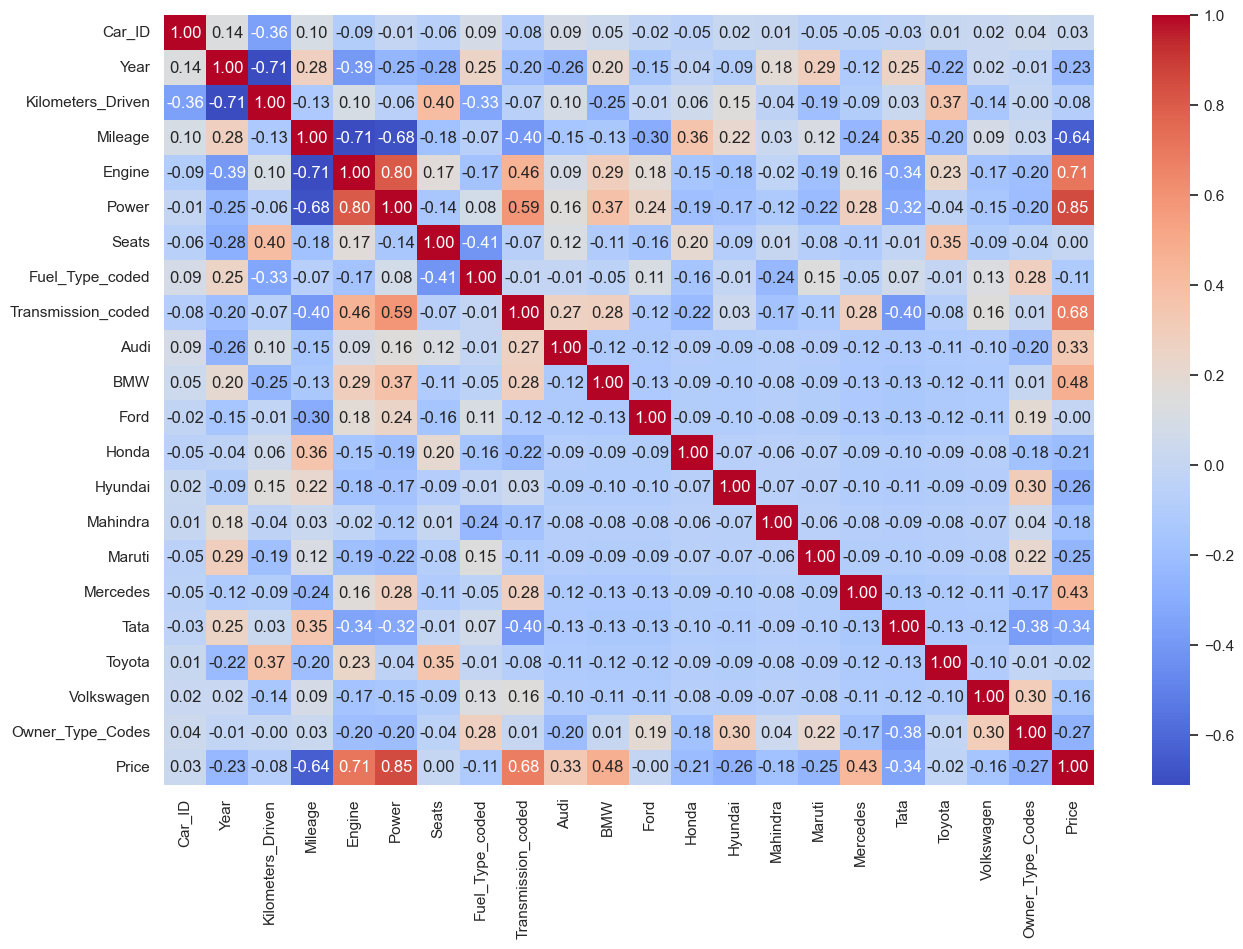

In [ ]:
df_correlation = pd.concat([X_train, y_train], axis=1)
corr = df_correlation.corr()

# Set the size of the figure
sns.set(rc={'figure.figsize':(15, 10)})
# Create a heatmap of the correlation matrix
sns.heatmap(corr, fmt='.2f', cmap='coolwarm', annot=True)

Price                 1.000000
Power                 0.849137
Engine                0.710561
Transmission_coded    0.680731
Mileage              -0.638404
Car_ID                     NaN
Year                       NaN
Kilometers_Driven          NaN
Seats                      NaN
Fuel_Type_coded            NaN
Audi                       NaN
BMW                        NaN
Ford                       NaN
Honda                      NaN
Hyundai                    NaN
Mahindra                   NaN
Maruti                     NaN
Mercedes                   NaN
Tata                       NaN
Toyota                     NaN
Volkswagen                 NaN
Owner_Type_Codes           NaN
Name: Price, dtype: float64

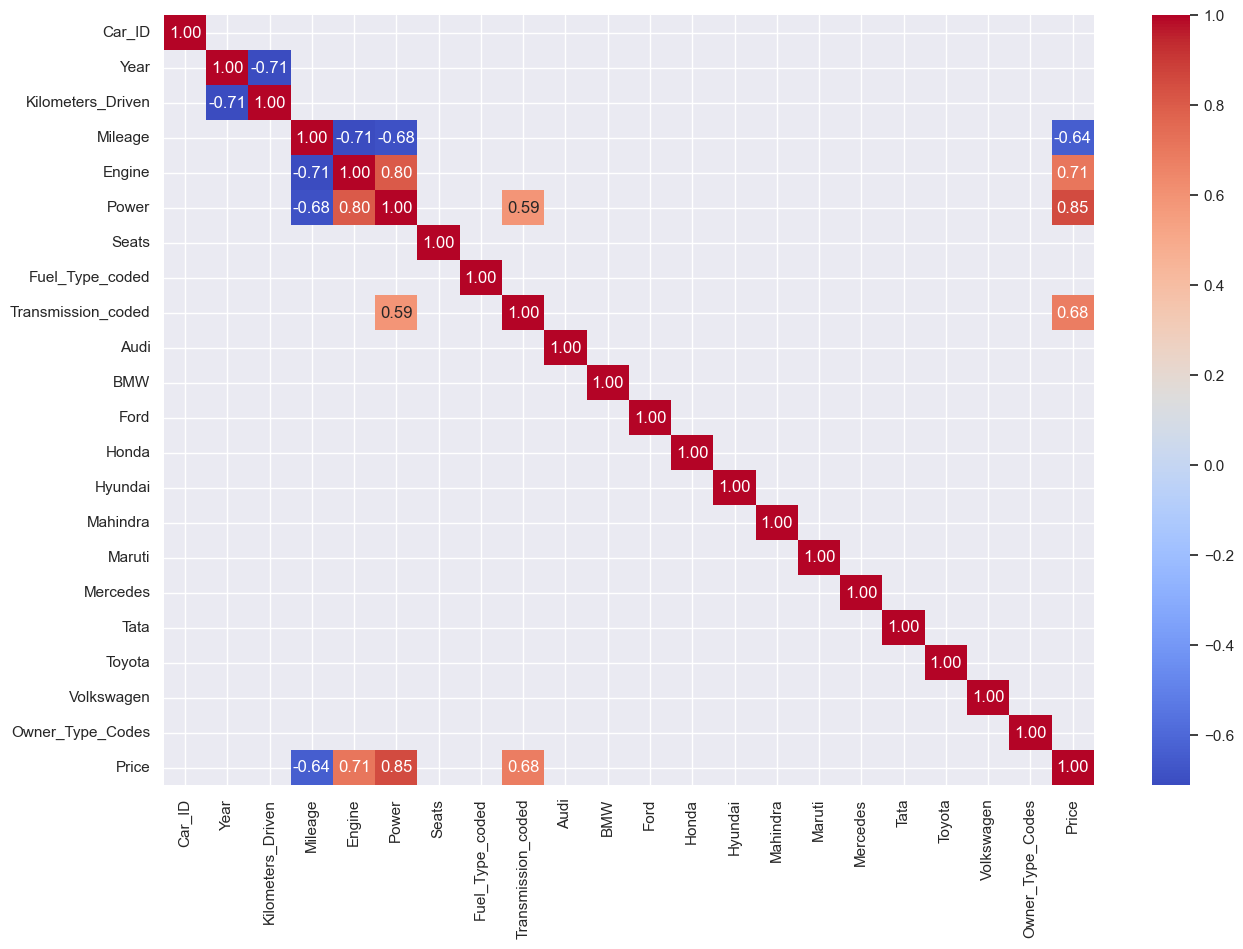

In [ ]:
sns.heatmap(corr[((corr>=0.5)|(corr<=-0.5))], fmt='.2f', cmap='coolwarm', annot=True)
corr[((corr>=0.5)|(corr<=-0.5))].Price.sort_values(ascending=False)

## Conclusion of Homework 5

- Price and Power (0.849137) - strong positive correlation between price and car power. The price increases with the increase in power.
- Price and Engine (0.710561) - strong positive correlation between price and engine volume (the same logic applies).
- Price and Transmission_coded (0.680731) - moderate positive correlation between price and type of transmission. This means that cars with automatic transmission (coded as 1) usually cost more.
- Price and Mileage (-0.638404) - moderate negative correlation between price and mileage. This is logical: an increase in mileage usually leads to a lower price for the car.

All correlations seem logical.

**Task 6**. Training linear regression.

0. Remove all NON-numeric columns from `X_train`, `X_test` if you haven't done so already.
1. Train a linear regression model using `sklearn` on all numeric data from the training set `X_train`.
2. Make predictions on `X_train`, `X_test`. Find and display the root mean squared error of the predictions from the actual values of the target variable.
3. Create a scatter plot of predictions against the actual data of the target variable for both the training and test datasets. What can you say about the quality of the model?

In [ ]:
X_test.drop(columns = X_test.select_dtypes(include=['object']).columns, inplace=True)

# We also remove the Car_id column - because these are unique indices of our data and they do not carry any information
X_train.drop(columns='Car_ID', inplace=True)
X_test.drop(columns='Car_ID', inplace=True)

print(X_train.shape, X_test.shape)
X_train.head()

(80, 20) (20, 20)


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_coded,Transmission_coded,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,2019,22000,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,2018,28000,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,2018,28000,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,2017,26000,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
def our_model(X_train, y_train, X_test, y_test):

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_traint_pred = model.predict(X_train)
    loss_train = root_mean_squared_error(y_train, y_traint_pred)
    print(f'RMSE on train: {loss_train}')

    y_test_pred = model.predict(X_test)
    loss_test = root_mean_squared_error(y_test, y_test_pred)
    # print(model.feature_names_in_ )
    print(f'RMSE on test : {loss_test}')

    return model, y_traint_pred, y_test_pred

model_1, y_train_pred, y_test_pred = our_model(X_train, y_train, X_test, y_test)

RMSE on train: 210342.8016204644
RMSE on test : 259601.26542723566


In [16]:
model_1.feature_names_in_

array(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Fuel_Type_coded', 'Transmission_coded', 'Audi', 'BMW', 'Ford',
       'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata',
       'Toyota', 'Volkswagen', 'Owner_Type_Codes'], dtype=object)

(0.0, 3000000.0)

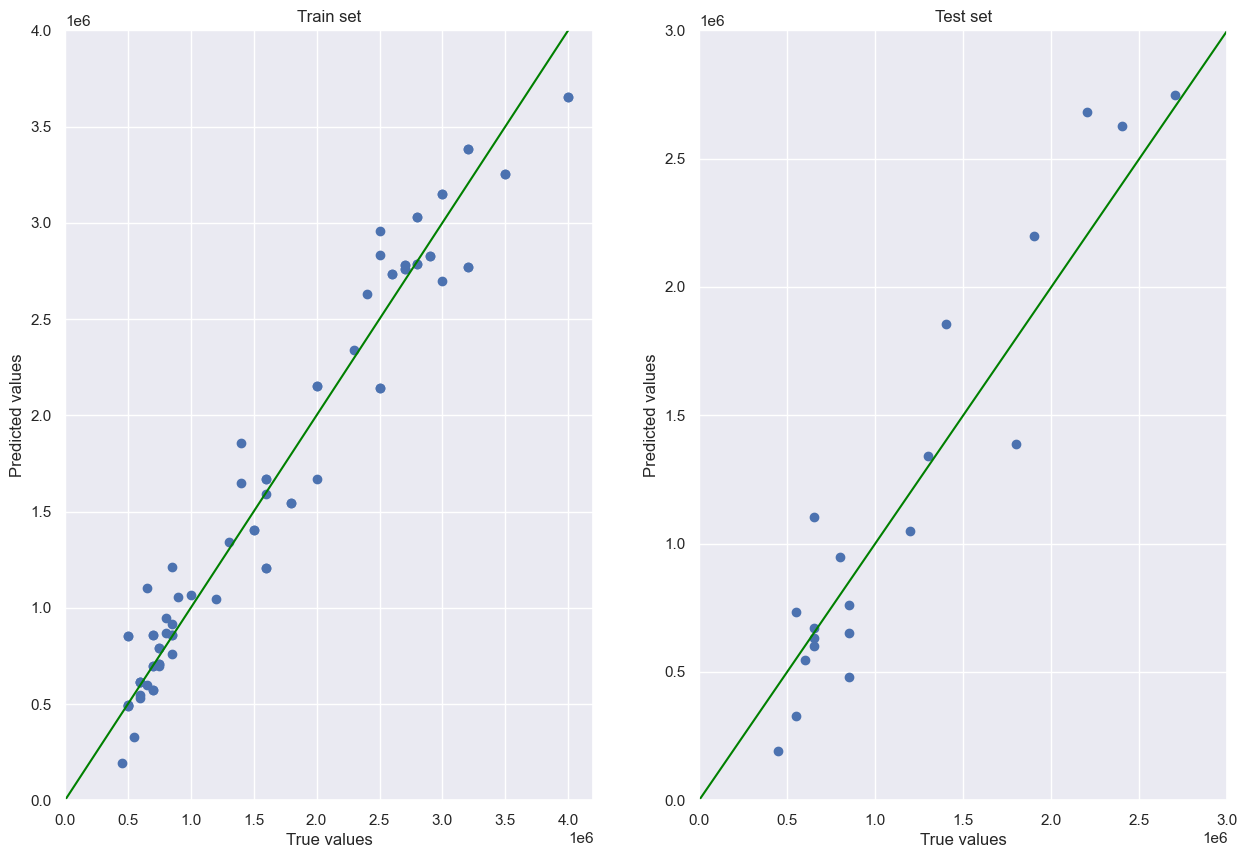

In [17]:
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Train set')
plt.plot([0, 4000000], [0, 4000000], color='green')
plt.xlim(0)
plt.ylim(0,max(max(y_train), max(y_train_pred)))

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred)
plt.plot([0, 3000000], [0, 3000000], color='green')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Test set')
plt.xlim(0, 3000000)
plt.ylim(0, 3000000)

(0.0, 456794.3278111389)

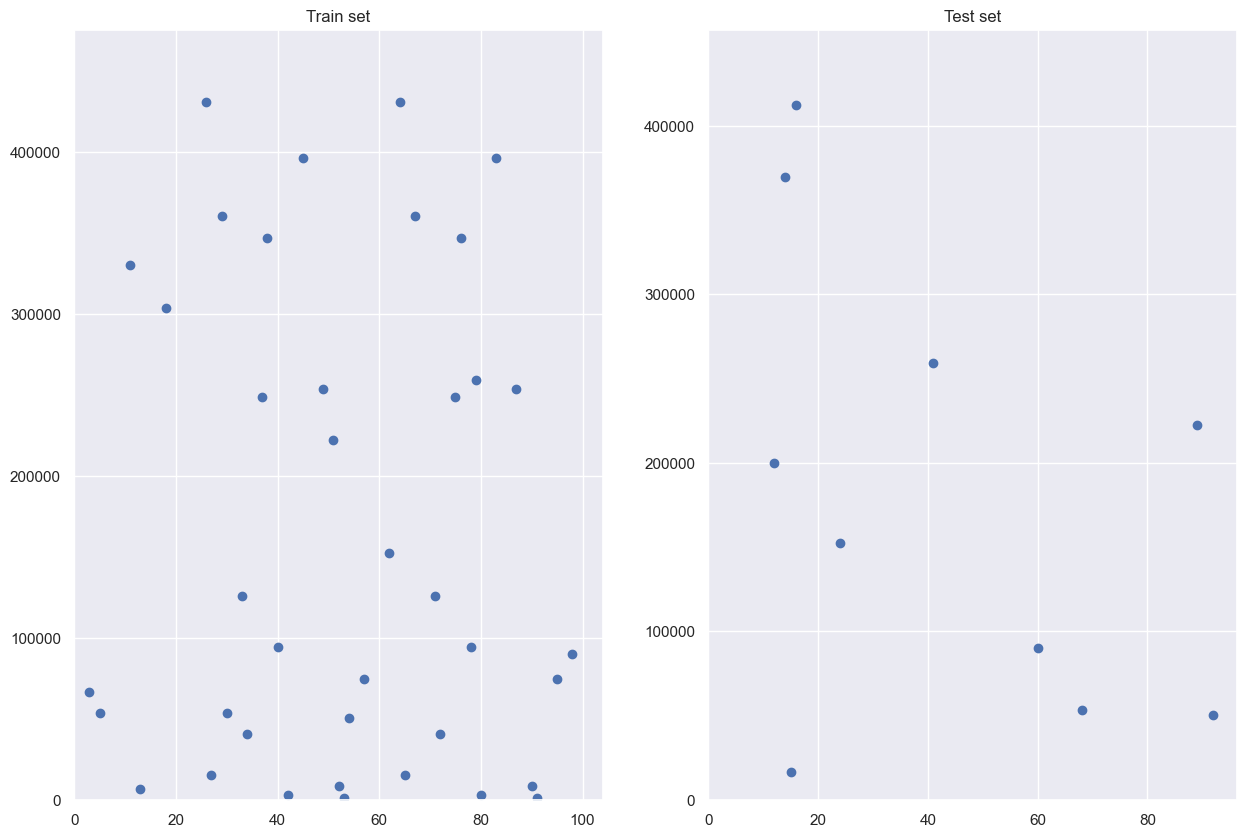

In [18]:
plt.subplot(1, 2, 1)
plt.plot((y_train - y_train_pred), 'o')
plt.title('Train set')
plt.xlim(0)
plt.ylim(0)

plt.subplot(1, 2, 2)
plt.plot(y_test - y_test_pred, 'o')
plt.title('Test set')
plt.xlim(0)
plt.ylim(0)

## Conclusion of Homework 6
'`Build a scatter plot of predictions against the actual data of the target variable for the training and test datasets. What can you say about the quality of the model?`'

Let's add an additional line to the plot that corresponds to a 45-degree angle - which represents the identity between the actual and predicted points.

**Training**:
- The points are located around the diagonal - the model has learned to make predictions close to the true values.
- However, we also have some spread, especially for larger values.
- RMSE on train: 210342.8016204644

**Test**:
- The points are more scattered compared to the training sample, indicating that the model's performance on the test sample is not as good.
- The spread is more pronounced.
- RMSE on test: 259601.26542723566

**Task 7**. We want to analyze how each factor affects the target variable. To do this, let's scale our data.
1. Scale the independent variables using `StandardScaler`. Train on the training data, and on the test data, just call `transform`.

2. Train the model on the scaled data and review the model coefficients. Which columns are the most influential in shaping the predictions in terms of coefficients? Analyze the direction of the most important coefficients. Does it make sense, in terms of the values of the corresponding variables, that they affect the target variable in the direction of increase/decrease?

In [ ]:
int_col = df_int.drop(['Car_ID', 'Price'], axis=1).columns

categor_col = ( ['Fuel_Type_coded'] + ['Transmission_coded'] +
    list(encod.categories_[0]) + 
    ['Owner_Type_Codes']
)

scale = StandardScaler()
scale.fit(X_train[int_col])

train_scaled = scale.transform(X_train[int_col])
X_train_scaled = np.concatenate([train_scaled, X_train[categor_col]], axis=1)

test_scaled = scale.transform(X_test[int_col])
X_test_scaled = np.concatenate([test_scaled, X_test[categor_col]], axis=1)

In [20]:
columns = list(int_col) + list(categor_col)
X_train_scaled_pd = pd.DataFrame(X_train_scaled, columns=columns)  # Create a DataFrame for the scaled training data
X_test_scaled_pd = pd.DataFrame(X_test_scaled, columns=columns)    # Create a DataFrame for the scaled test data

In [21]:
# checking if after all transformations we did not mix up the order of the columns

if list(X_train_scaled_pd.columns) == list(X_train.columns):
    print("The order of columns is the same. train")

if list(X_test_scaled_pd.columns) == list(X_test.columns):
    print("The order of columns is the same. test")

Порядок колонок однаковий. трейн
Порядок колонок однаковий. тест


In [22]:
model_scale_1, y_train_pred_scale, y_test_pred_scale = our_model(X_train_scaled_pd, y_train, X_test_scaled_pd, y_test)

RMSE on train: 210342.80162046402
RMSE on test : 259601.26542723458


In [23]:
coef_df = pd.DataFrame({
    'feature_names': list(model_scale_1.feature_names_in_) + ['CONST'],
    'coef': list(model_scale_1.coef_) + [model_scale_1.intercept_]
})

# Sort the DataFrame by the 'coef' column in descending order
coef_df.sort_values('coef', ascending=False)

,feature_names,coef
20,CONST,1.604276e+06
8,Audi,7.588030e+05
15,Mercedes,7.339747e+05
9,BMW,7.303268e+05
4,Power,5.000005e+05
7,Transmission_coded,2.363676e+05
17,Toyota,1.304575e+05
19,Owner_Type_Codes,6.627831e+04
5,Seats,-1.744049e+03
0,Year,-1.160426e+04


## Conclusion of Homework 7
`Which columns are the most influential in forming predictions in terms of coefficients? Analyze the direction of the most important coefficients. Does it make sense, in terms of the values of the corresponding variables, that they affect the target variable in the direction of increase/decrease?`

- Car manufacturers occupy the top important positions with both positive and negative coefficient signs: without expert knowledge, it is difficult to make a correct interpretation of manufacturers, as I am only familiar with a few of them and I may be biased according to their marketing campaigns rather than the actual state of the market. Also, considering the car manufacturer without the car brand may be incorrect, as one company can have cars in different segments.
    - Audi, Mercedes, BMW are usually classified in the high segment of cars and they may have a higher price due to their "name," which logically explains why they occupy top positions with a positive coefficient value.
    - According to the lowest regression indicators, Hyundai belongs to the budget segment, and I lack expertise on all other cars.

- Power has a positive impact - which is very logical. More power means a higher price.
- Transmission_coded positively influences as well, which also sounds logical, because 1 means Automatic, which is usually more expensive due to requiring more technical parts.
- Mileage - the negative coefficient makes sense - a higher mileage indicates more wear and tear on parts, and thus the price decreases.
- This also aligns with the logic of correlation analysis (Power = 0.849, Transmission_coded = 0.681, Mileage = -0.638404).

**Illogical**
- Owner_Type_Codes - positive coefficient, although logically it should be the opposite - the more owners, the lower the price (but this parameter also does not occupy top positions in coefficient importance).
- Fuel_Type_coded - negative coefficient; we coded 1 as gasoline cars, but they are usually more expensive than diesel.

*Suppression* - due to the fact that we only have 100 records, our cars do not represent the true market pattern. The coefficients of the categories Owner_Type_Codes and Fuel_Type_coded may have behaved "illogically" because of our dataset. Based on the previous correlation analysis, we also see a similar pattern, where Owner_Type_Codes has a slight negative correlation coefficient (-0.27).

**Task 8.** Train a model using `statsmodels` on the same scaled data. Output the report and analyze the p-value of the coefficients. Which features are statistically significant at the 0.05 significance level? Write down their list.

In [ ]:
#ADD CONSTANT 

Y = y_train.reset_index(drop=True)
X = X_train_scaled_pd.reset_index(drop=True)

X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

In [25]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
====================================================================================
Model:                     OLS                   Adj. R-squared:          0.946     
Dependent Variable:        Price                 AIC:                     2228.0692 
Date:                      2025-01-10 15:25      BIC:                     2275.7097 
No. Observations:          80                    Log-Likelihood:          -1094.0   
Df Model:                  19                    F-statistic:             73.14     
Df Residuals:              60                    Prob (F-statistic):      2.34e-34  
R-squared:                 0.959                 Scale:                   5.8992e+10
------------------------------------------------------------------------------------
                      Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
------------------------------------------------------------------------------------
const              1470585.9723  70852.3853 20.7556 0.0000 1328860.1003 1612311.8442
Year                -11604.2610  57979.4526 -0.2001 0.8420 -127580.4337  104371.9117
Kilometers_Driven   -99713.9587  56285.6300 -1.7716 0.0815 -212301.9818   12874.0644
Mileage            -131884.6331  57826.7715 -2.2807 0.0261 -247555.3983  -16213.8680
Engine              -24683.0841  69546.5953 -0.3549 0.7239 -163796.9873  114430.8191
Power               500000.5068  72265.8041  6.9189 0.0000  355447.3762  644553.6373
Seats                -1744.0488  41784.2461 -0.0417 0.9668  -85324.9853   81836.8877
Fuel_Type_coded    -370607.5145  89057.1489 -4.1615 0.0001 -548748.3354 -192466.6935
Transmission_coded  236367.6377  87535.4036  2.7003 0.0090   61270.7606  411464.5148
Audi                892492.6789 103936.2444  8.5869 0.0000  684589.2357 1100396.1221
BMW                 864016.4829 102679.0082  8.4147 0.0000  658627.8863 1069405.0794
Ford               -171408.5353 106494.9661 -1.6095 0.1127 -384430.1841   41613.1135
Honda               -55312.8720 136741.6788 -0.4045 0.6873 -328836.9543  218211.2103
Hyundai            -371353.6383 108619.2276 -3.4189 0.0011 -588624.4426 -154082.8340
Mahindra           -441222.9743 128922.1927 -3.4224 0.0011 -699105.7556 -183340.1930
Maruti             -260526.5973 115901.4055 -2.2478 0.0283 -492363.9262  -28689.2683
Mercedes            867664.3582 101326.5212  8.5631 0.0000  664981.1385 1070347.5779
Tata                  7185.4630 117369.4949  0.0612 0.9514 -227588.4821  241959.4080
Toyota              264147.1371 110007.2338  2.4012 0.0195   44099.9068  484194.3673
Volkswagen         -125095.5305 107139.5770 -1.1676 0.2476 -339406.5930   89215.5321
Owner_Type_Codes     66278.3066  71476.4867  0.9273 0.3575  -76695.9541  209252.5672
------------------------------------------------------------------------------------
Omnibus:                 0.150          Durbin-Watson:             2.054            
Prob(Omnibus):           0.928          Jarque-Bera (JB):          0.272            
Skew:                    0.093          Prob(JB):                  0.873            
Kurtosis:                2.784          Condition No.:             21791535979644396
====================================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
[2] The smallest eigenvalue is 4.85e-31. This might indicate that
there are strong multicollinearity problems or that the design                matrix
is singular.
"""

In [27]:
report = results.summary2().tables[1]
significant = report[report['P>|t|'] < 0.05]
significant

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,1.470586e+06,70852.385264,20.755631,4.527937e-29,1.328860e+06,1.612312e+06
Mileage,-1.318846e+05,57826.771535,-2.280685,2.613313e-02,-2.475554e+05,-1.621387e+04
Power,5.000005e+05,72265.804097,6.918909,3.439085e-09,3.554474e+05,6.445536e+05
Fuel_Type_coded,-3.706075e+05,89057.148897,-4.161457,1.024429e-04,-5.487483e+05,-1.924667e+05
Transmission_coded,2.363676e+05,87535.403555,2.700252,8.990654e-03,6.127076e+04,4.114645e+05
Audi,8.924927e+05,103936.244362,8.586924,4.920043e-12,6.845892e+05,1.100396e+06
BMW,8.640165e+05,102679.008220,8.414733,9.640821e-12,6.586279e+05,1.069405e+06
Hyundai,-3.713536e+05,108619.227561,-3.418857,1.135831e-03,-5.886244e+05,-1.540828e+05
Mahindra,-4.412230e+05,128922.192729,-3.422397,1.123548e-03,-6.991058e+05,-1.833402e+05
Maruti,-2.605266e+05,115901.405466,-2.247829,2.827471e-02,-4.923639e+05,-2.868927e+04


In [28]:
significant.index

Index(['const', 'Mileage', 'Power', 'Fuel_Type_coded', 'Transmission_coded',
       'Audi', 'BMW', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Toyota'],
      dtype='object')

## Conclusion of Homework 8
`Which features are statistically significant at the significance level of 0.05? Write their list.`

- Statistically significant features with a threshold of 0.05 (['Mileage', 'Power', 'Fuel_Type_coded', 'Transmission_coded', 'Audi', 'BMW', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Toyota']
- Most of them are included in the Top largest/smallest coefficients (compared to the analysis of conclusions 7)

**Task 9**. Train a linear regression with `statsmodels` only on the features that were statistically significant in the previous task. Analyze the model's metrics. Did R2 and Adj. R-squared change significantly?

In [29]:
sifnificant.drop('const', inplace=True)

C:\Users\Olha Shaposhnyk\AppData\Local\Temp\ipykernel_225708\3568230591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sifnificant.drop('const', inplace=True)


In [30]:
Y = y_train.reset_index(drop=True)
X = X_train_scaled_pd[sifnificant.index].reset_index(drop=True)

X = sm.add_constant(X)
model2 = sm.OLS(Y,X)
results2 = model2.fit()
# results2.params.sort_values(ascending=False)

In [31]:
results2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
====================================================================================
Model:                     OLS                   Adj. R-squared:          0.947     
Dependent Variable:        Price                 AIC:                     2219.9036 
Date:                      2025-01-10 15:25      BIC:                     2248.4879 
No. Observations:          80                    Log-Likelihood:          -1098.0   
Df Model:                  11                    F-statistic:             129.2     
Df Residuals:              68                    Prob (F-statistic):      4.53e-41  
R-squared:                 0.954                 Scale:                   5.7407e+10
------------------------------------------------------------------------------------
                      Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
------------------------------------------------------------------------------------
const              1347926.0289  66795.4241 20.1799 0.0000 1214637.8354 1481214.2223
Mileage             -98714.6932  40110.1099 -2.4611 0.0164 -178753.1714  -18676.2150
Power               462607.8608  46326.6028  9.9858 0.0000  370164.5642  555051.1575
Fuel_Type_coded    -264434.7244  56870.6461 -4.6498 0.0000 -377918.3318 -150951.1170
Transmission_coded  254645.0564  75066.6327  3.3923 0.0012  104851.9231  404438.1898
Audi                966467.5262 104663.1873  9.2341 0.0000  757615.3876 1175319.6647
BMW                1060240.4738 105196.9918 10.0786 0.0000  850323.1451 1270157.8026
Hyundai            -307347.6422 110724.0503 -2.7758 0.0071 -528294.0445  -86401.2398
Mahindra           -285940.6626 132635.5613 -2.1558 0.0346 -550610.8044  -21270.5207
Maruti             -117807.4930 118836.1686 -0.9913 0.3250 -354941.3754  119326.3895
Mercedes           1017277.2780 102854.7672  9.8904 0.0000  812033.7856 1222520.7704
Toyota              259702.4525 101046.1129  2.5701 0.0124   58068.0735  461336.8315
------------------------------------------------------------------------------------
Omnibus:                     0.359              Durbin-Watson:                 1.845
Prob(Omnibus):               0.836              Jarque-Bera (JB):              0.479
Skew:                        0.145              Prob(JB):                      0.787
Kurtosis:                    2.755              Condition No.:                 9    
====================================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
"""

## Conclusion of Homework 9
`Analyze the model indicators. Have R2 and Adj. R-squared changed significantly?`

|               |Original Model|Threshold 0.05|
|---------------|--------------|---------------|
|R-squared      |0.959         |0.954          |
|Adj. R-squared |0.946         |0.947          |
|AIC:           |2219.9036     |2228.0692      |
|BIC:           |2248.4879     |2275.7097      |
- The changes in the coefficients are quite insignificant. As noted in the previous conclusion, statistically significant parameters occupy the Top of the largest/smallest parameters that we kept in the sklearn model.
- R-squared slightly decreased with the reduction in the number of features in the model,
- but Adj. R-squared increased by one hundredth.
- AIC and BIC have increased, indicating a deterioration of the model.

The simplified model is worse, even considering that the evaluation criteria have a penalty for model complexity.

**Task 10**. Train a linear regression model using `statsmodels` on all features from the scaled `X_train` where the p_value in task 7 is less than `0.25`. This way, we have softened the feature selection criterion. Analyze the model metrics. Have R2 and Adj. R-squared changed significantly compared to task 7? Which model from the last 3 tasks would you keep for use?

In [32]:
significant25 = report[report['P>|t|'] < 0.25]
significant25

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,1.470586e+06,70852.385264,20.755631,4.527937e-29,1.328860e+06,1.612312e+06
Kilometers_Driven,-9.971396e+04,56285.630015,-1.771570,8.154400e-02,-2.123020e+05,1.287406e+04
Mileage,-1.318846e+05,57826.771535,-2.280685,2.613313e-02,-2.475554e+05,-1.621387e+04
Power,5.000005e+05,72265.804097,6.918909,3.439085e-09,3.554474e+05,6.445536e+05
Fuel_Type_coded,-3.706075e+05,89057.148897,-4.161457,1.024429e-04,-5.487483e+05,-1.924667e+05
Transmission_coded,2.363676e+05,87535.403555,2.700252,8.990654e-03,6.127076e+04,4.114645e+05
Audi,8.924927e+05,103936.244362,8.586924,4.920043e-12,6.845892e+05,1.100396e+06
BMW,8.640165e+05,102679.008220,8.414733,9.640821e-12,6.586279e+05,1.069405e+06
Ford,-1.714085e+05,106494.966125,-1.609546,1.127464e-01,-3.844302e+05,4.161311e+04
Hyundai,-3.713536e+05,108619.227561,-3.418857,1.135831e-03,-5.886244e+05,-1.540828e+05


In [33]:
sifnificant25.drop('const', inplace=True)  
sifnificant25.index

C:\Users\Olha Shaposhnyk\AppData\Local\Temp\ipykernel_225708\594834532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sifnificant25.drop('const', inplace=True)


Index(['Kilometers_Driven', 'Mileage', 'Power', 'Fuel_Type_coded',
       'Transmission_coded', 'Audi', 'BMW', 'Ford', 'Hyundai', 'Mahindra',
       'Maruti', 'Mercedes', 'Toyota', 'Volkswagen'],
      dtype='object')

In [45]:
sifnificant25.index.difference(sifnificant.index)

Index(['Ford', 'Kilometers_Driven', 'Volkswagen'], dtype='object')

In [34]:
Y = y_train.reset_index(drop=True)
X = X_train_scaled_pd[sifnificant25.index].reset_index(drop=True)

X = sm.add_constant(X)
model3 = sm.OLS(Y,X)
results3 = model3.fit()
# results3.params.sort_values(ascending=False)

In [35]:
results3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
====================================================================================
Model:                     OLS                   Adj. R-squared:          0.949     
Dependent Variable:        Price                 AIC:                     2219.5545 
Date:                      2025-01-10 15:25      BIC:                     2255.2849 
No. Observations:          80                    Log-Likelihood:          -1094.8   
Df Model:                  14                    F-statistic:             105.5     
Df Residuals:              65                    Prob (F-statistic):      4.79e-39  
R-squared:                 0.958                 Scale:                   5.5475e+10
------------------------------------------------------------------------------------
                      Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
------------------------------------------------------------------------------------
const              1413589.9458  88821.4805 15.9150 0.0000 1236201.2000 1590978.6916
Kilometers_Driven   -78876.3936  34427.6750 -2.2911 0.0252 -147633.2084  -10119.5789
Mileage            -123357.1466  44238.6103 -2.7884 0.0069 -211707.7523  -35006.5409
Power               465207.8235  48604.2916  9.5713 0.0000  368138.3502  562277.2967
Fuel_Type_coded    -323301.2729  61644.6242 -5.2446 0.0000 -446414.0887 -200188.4572
Transmission_coded  240643.7874  84561.3621  2.8458 0.0059   71763.0856  409524.4891
Audi                954412.0953 129033.7250  7.3966 0.0000  696713.9515 1212110.2390
BMW                 968007.5102 134420.5793  7.2013 0.0000  699551.0756 1236463.9448
Ford                -57475.1377 124689.6993 -0.4609 0.6464 -306497.6629  191547.3875
Hyundai            -271109.4693 122218.9646 -2.2182 0.0300 -515197.5966  -27021.3420
Mahindra           -357476.5504 143644.0604 -2.4886 0.0154 -644353.5486  -70599.5521
Maruti             -175615.0962 131903.4277 -1.3314 0.1877 -439044.4318   87814.2395
Mercedes            952897.9309 132441.9080  7.1948 0.0000  688393.1759 1217402.6860
Toyota              303089.4364 123181.3221  2.4605 0.0165   57079.3485  549099.5244
Volkswagen          -17090.7918 127695.8520 -0.1338 0.8939 -272117.0185  237935.4350
------------------------------------------------------------------------------------
Omnibus:                     0.294              Durbin-Watson:                 2.000
Prob(Omnibus):               0.863              Jarque-Bera (JB):              0.420
Skew:                        0.130              Prob(JB):                      0.811
Kurtosis:                    2.758              Condition No.:                 15   
====================================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
"""

## Conclusion of Homework 10
`Analyze the model indicators. Have R2 and Adj. R-squared changed significantly compared to task 7? Which model from the last 3 tasks would you keep for use?`

|               |Original Model|Threshold 0.05|Threshold 0.05|
|---------------|------------------|-----------|----------|
|R-squared      |**0.959**             |0.954      |0.958|
|Adj. R-squared |0.946             |0.947      |**0.949**|
|AIC:	        |2219.9036         |2228.0692  |**2219.5545**|
|BIC:	        |**2248.4879**         |2275.7097  |2255.2849|

- After softening the model, three columns were added ['Ford', 'Kilometers_Driven', 'Volkswagen']
- After selecting the threshold of 0.25, R-squared approached the original value of the full model
- Adj. R-squared improved compared to the other two models
- AIC is the best (lowest) for the model with a threshold of 0.25
- BIC is in between the two models

I would stick with the last version of the model with the softened indicator of 0.25. Because it has fewer variables (to minimize the risks of missing data when forming the table) but at the same time, according to the evaluation criteria, it is not inferior to the other models.

## Execution of Additional Task (Add Column `Model`)
`The column contains too many values for encoding in its current form, given the small amount of data. If you see a way to group the values in this column, reducing the number of unique values to 3-5, you can perform this transformation and use this column in the model.`

Approach to execution:
- First, we need to find out how cars can be classified: https://en.wikipedia.org/wiki/Vehicle_size_class
    - Euro Car Segment (EEC) - too many categories
    - EPA size classes (Vehicle size classes by U.S. Fuel Economy) - not suitable, as a car brand can have different specifications. It sounds similar to the `Engine` column. Therefore, more expertise is needed to determine the appropriateness of this division.
    - Vehicle Types, Car Body Styles - has a small number of categories, and if we think about it, this characteristic should influence the price https://www.caranddriver.com/shopping-advice/g26100588/car-types/
- Since I do not have expertise in cars, and manually classifying 58 different types of cars would take too long - we can turn to AI chats.
- Given that artificial intelligence can have biases and incorrectly classify models, we will consult two chats and compare their results. Chat-gpt and Microsoft Copilot were used.
- We will fix the car models that were equally distributed to a certain type and add them to the dictionary.
- For "Car Models" for which the chats provided different classifications (or ignored their existence) - we will conduct an annual search for their type on the internet and add them to our dictionary.
- The prompt that was used:
**Act as a vehicle expert to categorize car model. I have a car database: for each vehicle Brand ['Toyota' 'Honda' 'Ford' 'Maruti' 'Hyundai' 'Tata' 'Mahindra' 'Volkswagen' 'Audi' 'BMW' 'Mercedes'] and car models. Please split them into the groups based on Car Body Styles such as SEDAN, COUPE, HATCHBACK and so on
CAR Model data: ['Corolla' 'Civic' 'Mustang' 'Swift' 'Sonata' 'Nexon' 'Scorpio' 'Polo' 
 'A4' 'X1' 'C-Class' 'Endeavour' 'Creta' 'Harrier' 'Ertiga' 'City'
 'Tiguan' 'Q3' '5 Series' 'GLC' 'Innova' 'Figo' 'Verna' 'Altroz' 'Thar'
 'Passat' 'A6' 'X3' 'E-Class' 'Fortuner' 'Aspire' 'Elantra' 'Safari'
 'Vitara' 'WR-V' 'Ameo' 'A3' '7 Series' 'GLE' 'Yaris' 'Ranger' 'Santro'
 'Tigor' 'S-Cross' 'BR-V' 'T-Roc' 'Q7' 'X5' 'GLA' 'Camry' 'Venue' 'Tiago'
 'XUV300' 'Vento' 'A5' '3 Series' 'Innova Crysta' 'EcoSport']**
 - We will map the dictionary to our database to create a new column Category.

! This distribution by category may not be accurate due to the use of artificial intelligence, so it may introduce additional "noise" in some cases.

In [36]:
X_train['Model'] = df.Model
X_test['Model'] = df.Model

categories = {
    'Sedan': ['Corolla', 'Civic', 'City', 'Verna', 'Elantra', 'Camry', 'Yaris', 'Passat', 'A4', 'A6', '5 Series', '3 Series', 'C-Class', 'E-Class', 'Sonata', 'Vento', 'A3', '7 Series'],
    'Hatchback': ['Santro','Swift', 'Polo', 'Figo', 'WR-V', 'Ameo', 'Tigor', 'Venue', 'Tiago', 'Altroz', 'Aspire'],
    'SUV/Crossover': ['GLC', 'GLE', 'EcoSport', 'Creta', 'Endeavour', 'Innova', 'Thar', 'Fortuner', 'Safari', 'Vitara', 'S-Cross', 'T-Roc', 'X1', 'Q3', 'X3', 'X5', 'Harrier', 'Ertiga', 'Tiguan', 'Q7', 'GLA', 'BR-V', 'Nexon', 'XUV300', 'Scorpio', 'Ranger'],
    'MPV/Minivan': ['Innova Crysta'],
    'Coupe': ['Mustang', 'A5']
}

model_to_category = {}

for category, models in categories.items():
    for model in models:
        model_to_category[model] = category

print(model_to_category)

# # Map the 'Model' column to the categories
X_train['Category'] = X_train.Model.map(model_to_category).fillna('Unknown')
X_test['Category'] = X_test.Model.map(model_to_category).fillna('Unknown')

print(X_train.Category.unique())
print(X_train.Category.value_counts())
print(X_test.Category.value_counts())

{'Corolla': 'Sedan', 'Civic': 'Sedan', 'City': 'Sedan', 'Verna': 'Sedan', 'Elantra': 'Sedan', 'Camry': 'Sedan', 'Yaris': 'Sedan', 'Passat': 'Sedan', 'A4': 'Sedan', 'A6': 'Sedan', '5 Series': 'Sedan', '3 Series': 'Sedan', 'C-Class': 'Sedan', 'E-Class': 'Sedan', 'Sonata': 'Sedan', 'Vento': 'Sedan', 'A3': 'Sedan', '7 Series': 'Sedan', 'Santro': 'Hatchback', 'Swift': 'Hatchback', 'Polo': 'Hatchback', 'Figo': 'Hatchback', 'WR-V': 'Hatchback', 'Ameo': 'Hatchback', 'Tigor': 'Hatchback', 'Venue': 'Hatchback', 'Tiago': 'Hatchback', 'Altroz': 'Hatchback', 'Aspire': 'Hatchback', 'GLC': 'SUV/Crossover', 'GLE': 'SUV/Crossover', 'EcoSport': 'SUV/Crossover', 'Creta': 'SUV/Crossover', 'Endeavour': 'SUV/Crossover', 'Innova': 'SUV/Crossover', 'Thar': 'SUV/Crossover', 'Fortuner': 'SUV/Crossover', 'Safari': 'SUV/Crossover', 'Vitara': 'SUV/Crossover', 'S-Cross': 'SUV/Crossover', 'T-Roc': 'SUV/Crossover', 'X1': 'SUV/Crossover', 'Q3': 'SUV/Crossover', 'X3': 'SUV/Crossover', 'X5': 'SUV/Crossover', 'Harrier': 

In [ ]:
encod_model = OneHotEncoder()
encod_model.fit(X_train[['Category']])
print(encod_model.categories_)

#transform train
code_train_brand = encod_model.transform(X_train[['Category']]).toarray()
X_train_scaled_pd[encod_model.categories_[0]] = code_train_brand

#transform test
code_test_brand = encod_model.transform(X_test[['Category']]).toarray()
X_test_scaled_pd[encod_model.categories_[0]] = code_test_brand

print(X_train_scaled_pd.shape, X_test_scaled_pd.shape)
print(X_test_scaled_pd.columns)

[array(['Coupe', 'Hatchback', 'MPV/Minivan', 'SUV/Crossover', 'Sedan'],
      dtype=object)]
(80, 25) (20, 25)
Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Fuel_Type_coded', 'Transmission_coded', 'Audi', 'BMW', 'Ford', 'Honda',
       'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Toyota',
       'Volkswagen', 'Owner_Type_Codes', 'Coupe', 'Hatchback', 'MPV/Minivan',
       'SUV/Crossover', 'Sedan'],
      dtype='object')


In [38]:
X_train_scaled_pd.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_coded,Transmission_coded,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Coupe,Hatchback,MPV/Minivan,SUV/Crossover,Sedan
0,0.568813,-0.693871,0.274862,-0.628491,-0.231967,-0.303562,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.323442,-0.039533,-0.018324,0.087196,0.247012,-0.303562,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.323442,-0.039533,-0.604696,0.111560,0.910213,-0.303562,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.215697,0.396692,0.274862,-0.476217,-0.784634,-0.303562,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,-1.215697,-0.257646,-1.484254,0.122219,0.910213,-0.303562,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [39]:
model_scale_2, y_train_pred_scale_2, y_test_pred_scale_2 = our_model(X_train_scaled_pd, y_train, X_test_scaled_pd, y_test)

RMSE on train: 193240.19845290756
RMSE on test : 267398.4166799392


In [40]:
coef_df = pd.DataFrame({
    'feature_names': list(model_scale_2.feature_names_in_) + ['CONST'],
    'coef': list(model_scale_2.coef_) + [model_scale_2.intercept_]
})

# Sort the DataFrame by the 'coef' column in descending order
coef_df.sort_values('coef', ascending=False)

,feature_names,coef
25,CONST,1.506735e+06
8,Audi,8.118249e+05
15,Mercedes,6.308429e+05
9,BMW,6.123286e+05
4,Power,5.798421e+05
17,Toyota,2.469751e+05
7,Transmission_coded,2.192362e+05
21,Hatchback,2.020746e+05
23,SUV/Crossover,1.986889e+05
24,Sedan,1.644563e+05


## Additional Conclusions:

|Dataset        |standard          | with Model category|
|-----          |----              |----|
|train          |210342.80162046402|193240.19845290756|
|test           |259601.26542723458|267398.4166799392|

We see an improvement in accuracy on the training dataset, but at the same time, we lose accuracy on the test set, which is very bad. Because we only have 100 records in our dataset, increasing the dimensionality of features leads to a deterioration in the model's generalization, as it becomes harder for it to capture all patterns. Thus, with a dimensionality of 80 records, we have as many as 25 features in the training set, while the test dataset has only 20 records.

Also, if we pay attention to the distribution of Car Model Types, we can see that there is no consistency in the distribution between the test and training sets. In some cases, certain categories are even absent in the test set.

| Category     | Train Count| Test Count|
|------        |-----       |--------|
| SUV/Crossover| 33         | 8         |
| Sedan        | 26         | 6         |
| Hatchback    | 15         | 5         |
| Coupe        | 5          | 0         |
| MPV/Minivan  | 1          | 1         |